In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from identification import *

plt.style.use('default')

In [2]:
df_data_n10 = pd.read_csv('../data/entrada_saida_nsenos_n10_111v.csv', header=None)
df_data_n11 = pd.read_csv('../data/entrada_saida_nsenos_n11_111v.csv', header=None)

In [3]:
data_n10 = np.array(df_data_n10   ,ndmin=2)
u_ar_n10 = np.array(df_data_n10[0],ndmin=2).T
y_ar_n10 = np.array(df_data_n10[1],ndmin=2).T

data_n11 = np.array(df_data_n11   ,ndmin=2)
u_ar_n11 = np.array(df_data_n11[0],ndmin=2).T
y_ar_n11 = np.array(df_data_n11[1],ndmin=2).T

In [4]:
def number_of_zeros(x):
    for i in range(x.size):
        if x[i] != 0:
            return i
    return 0

In [5]:
nz = number_of_zeros(y_ar_n10)
y_ar_n10 = y_ar_n10[nz-1:]
u_ar_n10 = u_ar_n10[nz-1:]
nz = number_of_zeros(y_ar_n11)
y_ar_n11 = y_ar_n11[nz-1:]
u_ar_n11 = u_ar_n11[nz-1:]


In [6]:
nmax = min(y_ar_n10.size,y_ar_n11.size)

y_ar_n10 = y_ar_n10[:nmax]
y_ar_n11 = y_ar_n11[:nmax]

u_ar_n10 = u_ar_n10[:nmax]
u_ar_n11 = u_ar_n11[:nmax]


In [7]:
print(y_ar_n10[:2].T, y_ar_n11[:2].T)

print(y_ar_n10.size, y_ar_n11.size)

[[  0.         130.65471631]] [[  0.         151.36558196]]
1199 1199


In [8]:
Y_ed_n10, phi_ed_n10 = build_Y_phi_ed_load(u_ar_n10,y_ar_n10)
theta_hat_ed_n10 = calcular_theta_min_quad(Y_ed_n10,phi_ed_n10)

y_hat_n10 = estimate_output_ed(y=y_ar_n10,u=u_ar_n10,theta=theta_hat_ed_n10)
y_hat_n11 = estimate_output_ed(y=y_ar_n11,u=u_ar_n11,theta=theta_hat_ed_n10)

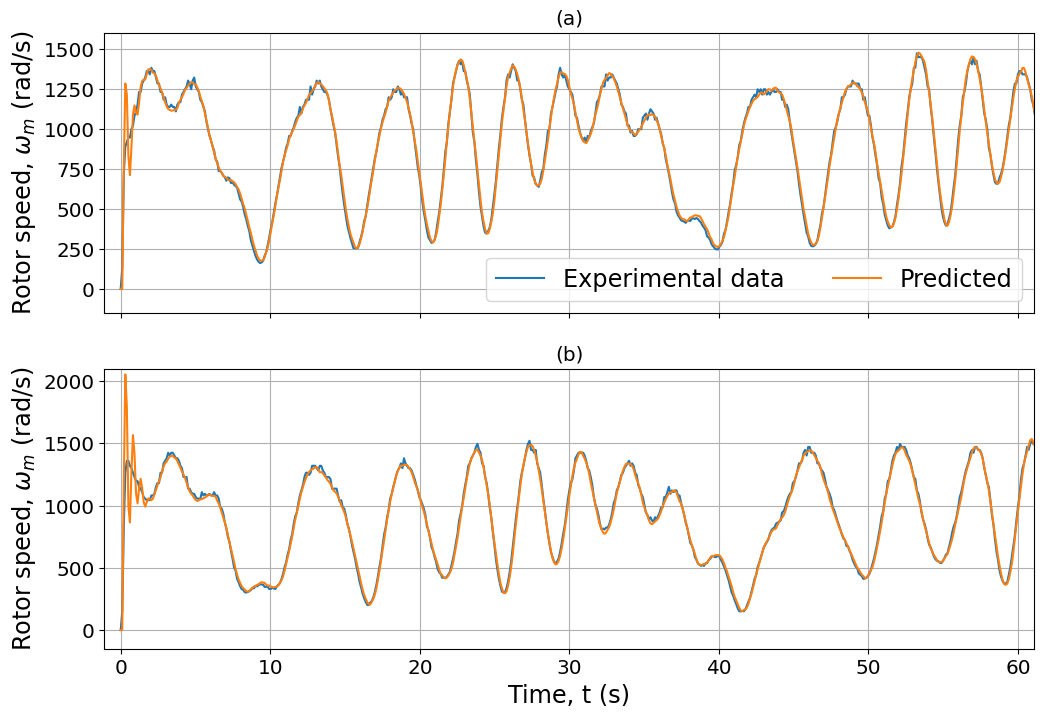

In [10]:
FS1 = 12    # figsize largura
FS2 = 8     # figsize altura
T1 = -1.1   # tempo 1
T2 = 61.1   # tempo 2
t = np.arange(0,y_ar_n10.size)*0.1024

fig, axs = plt.subplots(2, 1, figsize=[FS1,FS2], sharex=True)
axs[0].grid(True)
axs[1].grid(True)

axs[0].set_xlim([T1,T2])
axs[1].set_xlim([T1,T2])
axs[0].set_ylim([-150,1600])
axs[1].set_ylim([-150,2100])

axs[1].set_xlabel('Time, t (s)',fontsize='xx-large')
axs[0].set_ylabel('Rotor speed, $\omega_m$ (rad/s)',fontsize='xx-large')
axs[1].set_ylabel('Rotor speed, $\omega_m$ (rad/s)',fontsize='xx-large')

#plt.xticks(fontsize='x-large')
axs[0].tick_params(labelsize='x-large')
axs[1].tick_params(labelsize='x-large')

#axs[0].set_title('Input: multi-sines 10th order',fontsize='xx-large')
#axs[1].set_title('Input: multi-sines 11th order',fontsize='xx-large')
axs[0].set_title('(a)', fontsize='x-large')
axs[1].set_title('(b)', fontsize='x-large')

axs[0].plot(t, y_ar_n10,label='Experimental data' )
axs[0].plot(t,y_hat_n10,label='Predicted')
axs[1].plot(t, y_ar_n11,label='Experimental data' )
axs[1].plot(t,y_hat_n11,label='Predicted')
axs[0].legend(fontsize='xx-large', loc='lower right', ncol=2)
#axs[1].legend(fontsize='xx-large')

fig.savefig(fname='../figures/medido_estimado_n10_n11_60s_1.png')

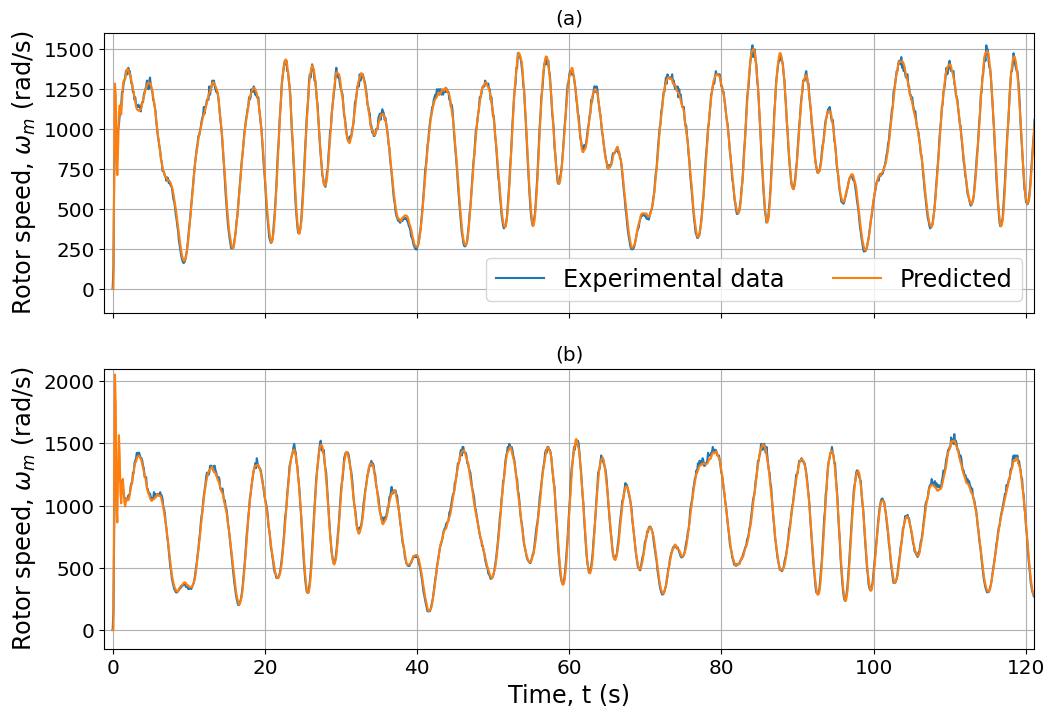

In [11]:
FS1 = 12    # figsize largura
FS2 = 8     # figsize altura
T1 = -1.1   # tempo 1
T2 = 121.1   # tempo 2
t = np.arange(0,y_ar_n10.size)*0.1024

fig, axs = plt.subplots(2, 1, figsize=[FS1,FS2], sharex=True)
axs[0].grid(True)
axs[1].grid(True)

axs[0].set_xlim([T1,T2])
axs[1].set_xlim([T1,T2])
axs[0].set_ylim([-150,1600])
axs[1].set_ylim([-150,2100])

axs[1].set_xlabel('Time, t (s)',fontsize='xx-large')
axs[0].set_ylabel('Rotor speed, $\omega_m$ (rad/s)',fontsize='xx-large')
axs[1].set_ylabel('Rotor speed, $\omega_m$ (rad/s)',fontsize='xx-large')

#plt.xticks(fontsize='x-large')
axs[0].tick_params(labelsize='x-large')
axs[1].tick_params(labelsize='x-large')

#axs[0].set_title('Input: multi-sines 10th order',fontsize='xx-large')
#axs[1].set_title('Input: multi-sines 11th order',fontsize='xx-large')
axs[0].set_title('(a)', fontsize='x-large')
axs[1].set_title('(b)', fontsize='x-large')

axs[0].plot(t, y_ar_n10,label='Experimental data' )
axs[0].plot(t,y_hat_n10,label='Predicted')
axs[1].plot(t, y_ar_n11,label='Experimental data' )
axs[1].plot(t,y_hat_n11,label='Predicted')
axs[0].legend(fontsize='xx-large', loc='lower right', ncol=2)
#axs[1].legend(fontsize='xx-large')

fig.savefig(fname='../figures/medido_estimado_n10_n11_120s_1.png')